In [85]:
# 주식 데이터 수집 라이브러리 설치
# !pip install -U finance-datareader

## FinanceDataReader
* 금융 데이터 수집을 위한 라이브러리
* FinanceDataReader를 이용하여 수집할 수 있는 데이터
  * 거래소 별 상장종목 목록
  * 국내외 주식 데이터 : 국내주식, 미국주식 및 기타 글로벌 종목
  * 국내외 주가 지수 : KOSPI, KOSDAQ, S&P 500, NASDAQ, DOW,니케이225, 항셍 지수 등 글로벌 주요 지수
  * 상품선물 : 천연가스 선물, 금 선물, 은 선물, 구리 선물, WTI유 선물
  * 환율 : 달러당 원화 환율, 달러달 유로화 환율, 달러당 루블화 환율 등
  * 채권 수익률 : 1/3/5/10년 만기 한국 국채 수익률, 1/3/5/10년 만기 미국 국채 수익률
  * 암호화폐 가격 : 비트코인 원화/달러 가격, 이더리움 원화/달러 가격, 리플 원화/달러 가격 등
* 사용하는 함수는 아래 두가지이며, 분석할 데이터를 불러오는 데 사용하는 함수는 DataReader 한가지이다.
  * **`DataReader(symbol, startdate, enddate)`**
    * symbol : 수집 대상 코드
    * startdate : 수집 시작 날짜
    * enddate : 수집 종료 날짜
  * **`StockListing(market)`**
    * 거래소 별 상장 종목 목록을 가져오는 함수

* 데이터 제공 형식
  * 일별 데이터: 시가, 고가, 저가, 종가, 거래량
  * 시계열 데이터: DateTime 인덱스


* [FinanceData/FinanceDataReader: Financial data reader](https://github.com/FinanceData/FinanceDataReader)
* [FinanceDataReader 사용자 안내서 | FinanceData](https://financedata.github.io/posts/finance-data-reader-users-guide.html)

## 라이브러리 import

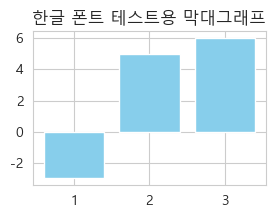

In [86]:
# 기본 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr
from datetime import datetime, timedelta
import platform
import matplotlib.font_manager as fm

# seaborn 스타일 적용 (시각적으로 더 깔끔)
sns.set_style("whitegrid")

# 한글 폰트 설정 (운영체제별 대응)
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':  # macOS
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')  # 리눅스 또는 colab용

plt.rc('axes', unicode_minus=False)

# 테스트용 그래프 출력
plt.figure(figsize=(3, 2))
plt.bar([1, 2, 3], [-3, 5, 6], color='skyblue')
plt.title('한글 폰트 테스트용 막대그래프')
plt.show()

## 마켓별 상장 종목 정보 수집
* **`fdr.StockListing(마켓코드)`**
* 마켓코드
    * 한국시장
      * `'KRX'` : 한국거래소 전체 상장 기업 목록 (KOSPI+KOSDAQ+KONEX)
      * `'KOSPI'` : 코스피 상장 기업 목록만
      * `'KOSDAQ'` : 코스닥 상장 기업 목록만
      * `'KONEX'` : 코넥스 상장 기업 목록만
      * `'KRX-DELISTING'` : 한국거래소에서 상장폐지된 종목 리스트
    * 해외시장
      * `'NYSE'` : 뉴욕증권거래소 상장 기업 목록
      * `'NASDAQ'` : 나스닥 상장 기업 목록
      * `'AMEX'` : AMEX 종목 상장 기업 목록
      * `'S&P500'` : S&P500 지수 구성 종목 목록
      * `'SSE'` : 상하이 거래소(Shanghai Stock Exchange)
      * `'SZSE'` : 선전거래소(Shenzhen Stock Exchange)
      * `'HKEX'` : 홍콩 거래소(Hong Kong Stock Exchange)
      * `'TSE'` : 도쿄 거래소(Tokyo Stock Exchange)
      * `'HOSE'` : 호찌민 거래소(Ho Chi Minh Stock Exchange)
      
  
* 컬럼정보
    * `Close` : 최종일 기준 종가
    * `Volume`: 최종일 기준 거래량
    * `Amount`: 최종일 기준 거래금액
    * `Stocks`: 상장주식수
    * `Marcap`: 시가총액
* 마켓에 따라 제공되는 정보(컬럼)이 다르다.


In [87]:
# 한국거래소 전체 상장 종목 정보 수집
try:
    krx_stocks = fdr.StockListing('KRX')
    print(f"[성공] KRX 전체 상장 종목 수: {len(krx_stocks)}개")
    
    # 컬럼 정보 출력
    print("\n📌 주요 컬럼:", krx_stocks.columns.tolist())
    
    # 상위 5개 종목 샘플 출력
    print("\n📄 상위 5개 종목 예시:")
    display(krx_stocks.head())

except Exception as e:
    print(f"[오류] KRX 종목 목록 수집 중 문제가 발생했습니다: {e}")

[성공] KRX 전체 상장 종목 수: 2880개

📌 주요 컬럼: ['Code', 'ISU_CD', 'Name', 'Market', 'Dept', 'Close', 'ChangeCode', 'Changes', 'ChagesRatio', 'Open', 'High', 'Low', 'Volume', 'Amount', 'Marcap', 'Stocks', 'MarketId']

📄 상위 5개 종목 예시:


,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,54200,2,-500,-0.91,54200,54500,54000,3665456,198838564300,320844375372400,5919637922,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,202000,2,-1000,-0.49,200500,202500,200000,414634,83306681000,147056477730000,728002365,STK
2,207940,KR7207940008,삼성바이오로직스,KOSPI,,1037000,2,-6000,-0.58,1033000,1042000,1023000,19180,19803037500,73807438000000,71174000,STK
3,373220,KR7373220003,LG에너지솔루션,KOSPI,,273500,2,-4500,-1.62,275500,276500,272000,39999,10964377000,63999000000000,234000000,STK
4,012450,KR7012450003,한화에어로스페이스,KOSPI,,877000,1,44000,5.28,842000,881000,834000,178584,154103119000,41478768277000,47296201,STK


## 특정 종목에 대한 가격 데이터 수집
* **`fdr.DataReader(코드)`** 
* 일별 데이터 제공
* 날짜가 인덱스로 지정됨
* 수집할 수 있는 데이터 종류
  * 국내주식: '**`005930`**'(삼성전자), '**`091990`**'(셀트리온헬스케어) 등 주식 종목 코드를 이용하여 수집<br>
  * 해외주식: '**`AAPL`**'(애플), '**`AMZN`**'(아마존) 등 주식 종목 코드를 이용하여 수집 <br>
  * 각종 지수
    * 한국 지수
      * '**`KS11`**': 코스피 지수
      * '**`KQ11`**': 코스닥 지수
      * '**`KS200`**': KOSPI 200 지수
    * 미국 지수
      * '**`DJI`**': 다우존스 산업평균지수
      * '**`IXIC`**': 나스닥 종합지수
      * '**`US500`**': S&P 500 지수
      * '**`RUT`**': 러셀 2000 지수
      * '**`VIX`**': 변동성 지수
    * 글로벌 지수
      * '**`SSEC`**': 상해 종합지수
      * '**`HSI`**': 홍콩 항셍지수
      * '**`N225`**': 일본 닛케이225 지수
      * '**`FTSE`**': 영국 FTSE 100 지수
      * '**`FCHI`**': 프랑스 CAC 40 지수
      * '**`GDAXI`**': 독일 DAX 지수
<br>
  * 환율
    * 달러 기준 환율
      * '**`USD/KRW`**': 달러당 원화 환율
      * '**`USD/EUR`**': 달러당 유로화 환율
      * '**`USD/JPY`**': 달러당 엔화 환율
      * '**`USD/CNY`**': 달러당 위엔화 환율
      * '**`USD/RUB`**': 달러당 루블화 환율
    * 기타 통화 환율
      * '**`CNY/KRW`**': 위엔화 원화 환율
      * '**`EUR/USD`**': 유로화 달러 환율
      * '**`JPY/KRW`**': 엔화 원화 환율
      * '**`AUD/USD`**': 호주 달러 환율
      * '**`EUR/JPY`**': 유로화 엔화 환율
      * '**`EUR/CNY`**': 유로화 위엔화 환율
  <br>
  * 채권
    * 한국 국채 수익률
      * '**`KR1YT=RR`**': 1년만기 한국국채
      * '**`KR2YT=RR`**': 2년만기 한국국채
      * '**`KR3YT=RR`**': 3년만기 한국국채
      * '**`KR4YT=RR`**': 4년만기 한국국채
      * '**`KR5YT=RR`**': 5년만기 한국국채
      * '**`KR10YT=RR`**': 10년만기 한국국채
      * '**`KR20YT=RR`**': 20년만기 한국국채
      * '**`KR30YT=RR`**': 30년만기 한국국채
      * '**`KR50YT=RR`**': 50년만기 한국국채8
    * 미국 국채 수익률
      * 단기 국채
        * '**`US1MT=X`**': 1개월만기 미국국채
        * '**`US3MT=X`**': 3개월만기 미국국채
        * '**`US6MT=X`**': 6개월만기 미국국채
      * 장기 국채
        * '**`US1YT=X`**': 1년만기 미국국채
        * '**`US2YT=X`**': 2년만기 미국국채
        * '**`US3YT=X`**': 3년만기 미국국채
        * '**`US5YT=X`**': 5년만기 미국국채
        * '**`US7YT=X`**': 7년만기 미국국채
        * '**`US10YT=X`**': 10년만기 미국국채
        * '**`US30YT=X`**': 30년만기 미국국채
  * 선물
    * 에너지 선물
      * '**`CL=F`**': WTI유 선물 (NYMEX)
      * '**`BZ=F`**': 브렌트유 선물 (NYMEX)
      * '**`NG=F`**': 천연가스 선물 (NYMEX)
    * 금속 선물
      * '**`GC=F`**': 금 선물 (COMEX)
      * '**`SI=F`**': 은 선물 (COMEX)
      * '**`HG=F`**': 구리 선물 (COMEX)
  * 암호화폐
    * 원화(KRW) 거래 가능
      * '**`BTC/KRW`**':비트코인
      * '**`ETH/KRW`**':이더리움
      * '**`XRP/KRW`**':리플
      * '**`BCH/KRW`**':비트코인 캐시
      * '**`USDT/KRW`**':테더
      * '**`BNB/KRW`**':바이낸스 코인
      * '**`USDC/KRW`**':USD 코인
      * '**`ADA/KRW`**':카르다노
      * '**`SOL/KRW`**':솔라나
      * '**`DOGE/KRW`**':도지코인
    * 달러(USD) 거래 가능
      * '**`BTC/USD`**':비트코인
      * '**`ETH/USD`**':이더리움
      * '**`EOS/USD`**':이오스

##  개별 종목 데이터 수집
* `fdr.DataReader(종목코드)`

In [88]:
# 삼성전자 전체 기간 주가 데이터 수집
df_005930 = fdr.DataReader('005930')

print("삼성전자 전체 기간 데이터 (5개 샘플):")
print(df_005930.head())

print("\n데이터 기간:", df_005930.index.min(), "부터", df_005930.index.max())
print("컬럼 목록:", df_005930.columns.tolist())

삼성전자 전체 기간 데이터 (5개 샘플):
             Open   High    Low  Close  Volume    Change
Date                                                    
2013-03-11  29860  30240  29700  30160  274965       NaN
2013-03-12  30079  30240  29800  29880  174931 -0.009284
2013-03-13  30120  30580  30020  30540  226071  0.022088
2013-03-14  30560  30680  29980  30400  251156 -0.004584
2013-03-15  30580  30580  29599  29600  732367 -0.026316

데이터 기간: 2013-03-11 00:00:00 부터 2025-05-27 00:00:00
컬럼 목록: ['Open', 'High', 'Low', 'Close', 'Volume', 'Change']


## 여러종목 종가(Close)를 한번에 수집
* `fdr.DataReader('종목코드,종목코드,...')`
    * 종목코드를 따옴표로 묶어서 한번에 전달


In [89]:
# 삼성전자(005930), 하이닉스(000660) 종가 데이터 동시 수집
multi_df = fdr.DataReader(['005930', '000660'])

# 멀티인덱스 여부에 따라 분기 처리
if isinstance(multi_df.columns, pd.MultiIndex):
    close_df = multi_df.xs('Close', axis=1, level=1)
    close_df.columns = ['삼성전자', '하이닉스']
else:
    close_df = multi_df[['005930', '000660']]
    close_df.columns = ['삼성전자', '하이닉스']

# 종가 샘플 출력
print("삼성전자/하이닉스 종가 데이터:")
print(close_df.head())

삼성전자/하이닉스 종가 데이터:
             삼성전자   하이닉스
Date                    
2013-03-11  30160  28600
2013-03-12  29880  28100
2013-03-13  30540  28300
2013-03-14  30400  28900
2013-03-15  29600  28800


## 기간에 따른 주가 변동 그래프

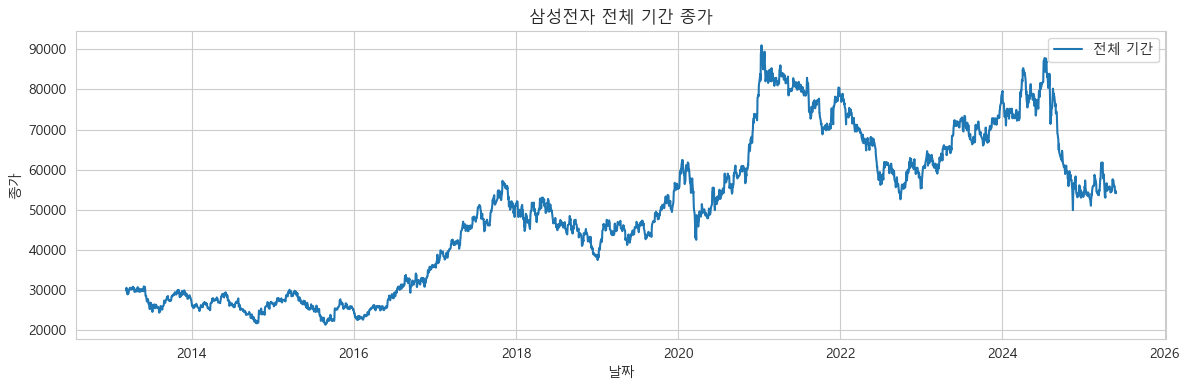

In [90]:
# --------------------------------
# 전체 기간 Close 시각화
# --------------------------------
plt.figure(figsize=(12, 4))
plt.plot(close_df['삼성전자'], label='전체 기간')
plt.title('삼성전자 전체 기간 종가')
plt.xlabel('날짜')
plt.ylabel('종가')
plt.legend()
plt.tight_layout()
plt.show()

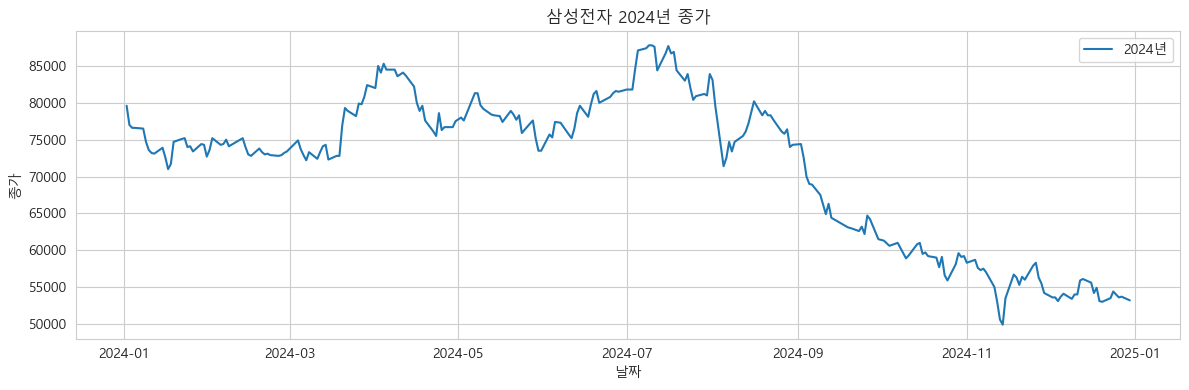

In [91]:
# --------------------------------
# 2024년 Close 시각화
# --------------------------------
close_2024 = close_df[close_df.index.year == 2024]
plt.figure(figsize=(12, 4))
plt.plot(close_2024['삼성전자'], label='2024년')
plt.title('삼성전자 2024년 종가')
plt.xlabel('날짜')
plt.ylabel('종가')
plt.legend()
plt.tight_layout()
plt.show()

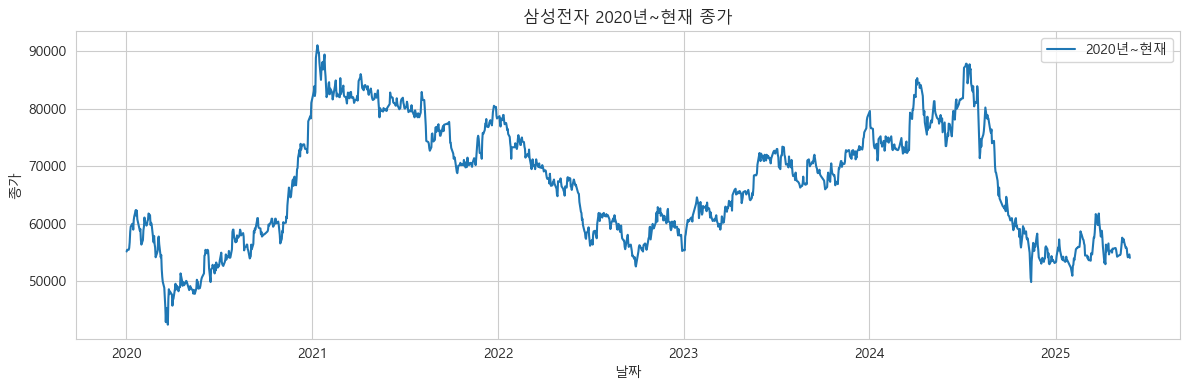

In [92]:
# --------------------------------
# 2020년~현재 Close 시각화
# --------------------------------
close_2020 = close_df[close_df.index >= '2020-01-01']
plt.figure(figsize=(12, 4))
plt.plot(close_2020['삼성전자'], label='2020년~현재')
plt.title('삼성전자 2020년~현재 종가')
plt.xlabel('날짜')
plt.ylabel('종가')
plt.legend()
plt.tight_layout()
plt.show()

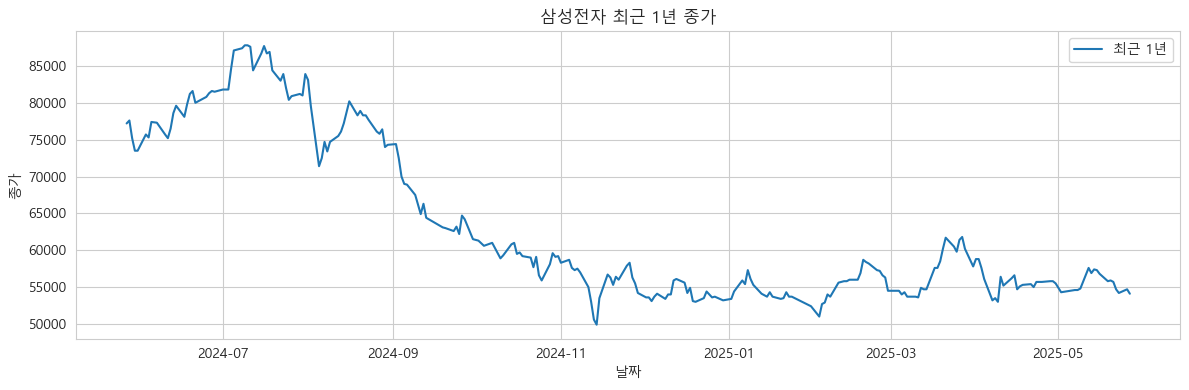

In [93]:
# --------------------------------
# 최근 1년 시각화
# --------------------------------
one_year_ago = close_df.index.max() - pd.DateOffset(years=1)
close_1y = close_df[close_df.index >= one_year_ago]
plt.figure(figsize=(12, 4))
plt.plot(close_1y['삼성전자'], label='최근 1년')
plt.title('삼성전자 최근 1년 종가')
plt.xlabel('날짜')
plt.ylabel('종가')
plt.legend()
plt.tight_layout()
plt.show()

## 상관관계

- 삼성전자, 하이닉스 상관관계

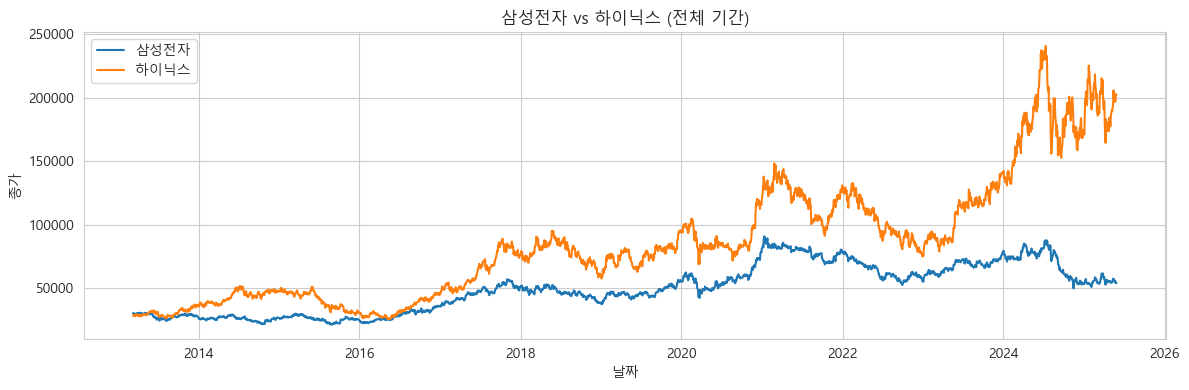

In [94]:
# ----------------------
# 전체 기간 시각화
# ----------------------
plt.figure(figsize=(12, 4))
plt.plot(close_df['삼성전자'], label='삼성전자')
plt.plot(close_df['하이닉스'], label='하이닉스')
plt.title('삼성전자 vs 하이닉스 (전체 기간)')
plt.xlabel('날짜')
plt.ylabel('종가')
plt.legend()
plt.tight_layout()
plt.show()

In [95]:
# ----------------------
# 전체 기간 상관관계
# ----------------------
corr_all = close_df[['삼성전자', '하이닉스']].corr()
print("전체 기간 상관관계:")
print(corr_all)

전체 기간 상관관계:
          삼성전자      하이닉스
삼성전자  1.000000  0.817754
하이닉스  0.817754  1.000000


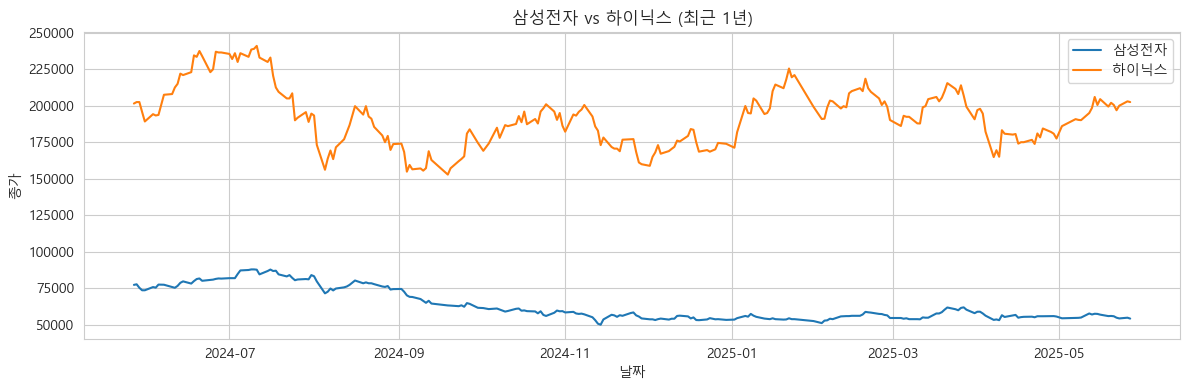

In [96]:
# ----------------------
# 최근 1년 시각화
# ----------------------
one_year_ago = close_df.index.max() - pd.DateOffset(years=1)
df_1y = close_df[close_df.index >= one_year_ago]

plt.figure(figsize=(12, 4))
plt.plot(df_1y['삼성전자'], label='삼성전자')
plt.plot(df_1y['하이닉스'], label='하이닉스')
plt.title('삼성전자 vs 하이닉스 (최근 1년)')
plt.xlabel('날짜')
plt.ylabel('종가')
plt.legend()
plt.tight_layout()
plt.show()

In [97]:
# ----------------------
# 최근 1년 상관관계
# ----------------------
corr_1y = df_1y[['삼성전자', '하이닉스']].corr()
print("최근 1년 상관관계:")
print(corr_1y)

최근 1년 상관관계:
          삼성전자      하이닉스
삼성전자  1.000000  0.418227
하이닉스  0.418227  1.000000


- 삼성전자, 코스피 상관관계

In [98]:
# -----------------------------
# 코스피(ks11) 데이터 불러오기
# -----------------------------
ks11 = fdr.DataReader('KS11')  # 코스피 지수 전체 기간
ks11_close = ks11[['Close']].rename(columns={'Close': '코스피'})

In [99]:
# -----------------------------
# 코스피(ks11)와 삼성전자(005930) Close 데이터 연결
# -----------------------------
samsung_close = df_005930[['Close']].rename(columns={'Close': '삼성전자'})
kospi_df = pd.concat([ks11_close, samsung_close], axis=1).dropna()

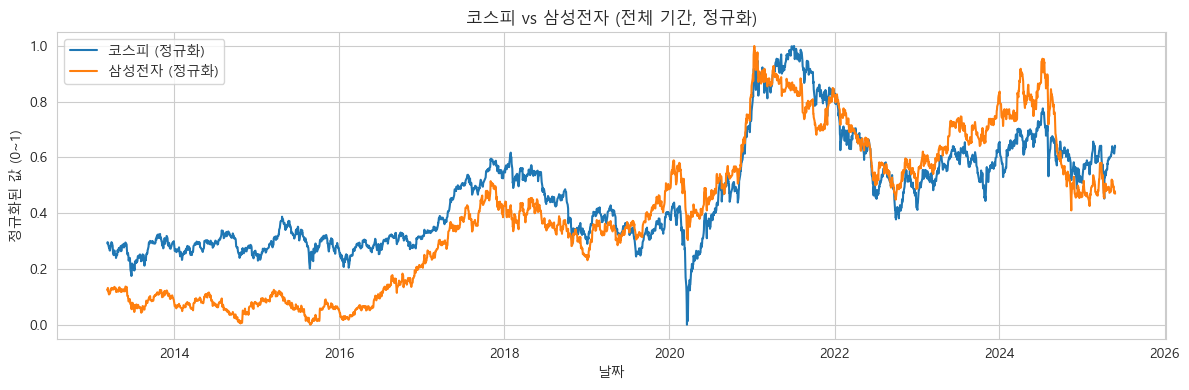

In [100]:
# -----------------------------
# 코스피(ks11)와 삼성전자(005930) 전체기간 시각화
# -----------------------------
kospi_norm = (kospi_df - kospi_df.min()) / (kospi_df.max() - kospi_df.min())

plt.figure(figsize=(12, 4))
plt.plot(kospi_norm['코스피'], label='코스피 (정규화)')
plt.plot(kospi_norm['삼성전자'], label='삼성전자 (정규화)')
plt.title('코스피 vs 삼성전자 (전체 기간, 정규화)')
plt.xlabel('날짜')
plt.ylabel('정규화된 값 (0~1)')
plt.legend()
plt.tight_layout()
plt.show()

In [101]:
# -----------------------------
# 코스피(ks11)와 삼성전자(005930) 전체기간 상관관계
# -----------------------------
print("전체 기간 상관관계:")
print(kospi_df.corr())

전체 기간 상관관계:
           코스피      삼성전자
코스피   1.000000  0.893815
삼성전자  0.893815  1.000000


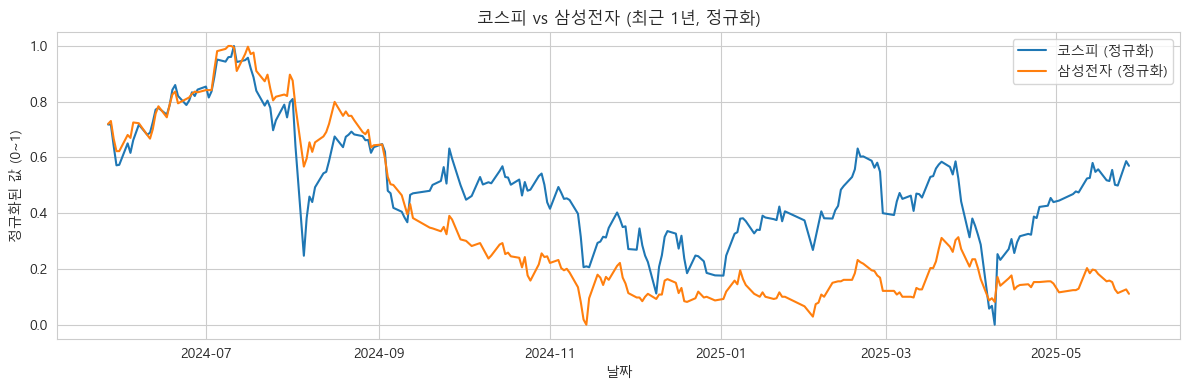

In [102]:
# -----------------------------
# 코스피(ks11)와 삼성전자(005930) 최근1년 시각화
# -----------------------------
kospi_1y = kospi_df[kospi_df.index >= (kospi_df.index.max() - pd.DateOffset(years=1))]
kospi_1y_norm = (kospi_1y - kospi_1y.min()) / (kospi_1y.max() - kospi_1y.min())

plt.figure(figsize=(12, 4))
plt.plot(kospi_1y_norm['코스피'], label='코스피 (정규화)')
plt.plot(kospi_1y_norm['삼성전자'], label='삼성전자 (정규화)')
plt.title('코스피 vs 삼성전자 (최근 1년, 정규화)')
plt.xlabel('날짜')
plt.ylabel('정규화된 값 (0~1)')
plt.legend()
plt.tight_layout()
plt.show()

In [103]:
# -----------------------------
# 코스피(ks11)와 삼성전자(005930) 최근1년 상관관계
# -----------------------------
print("최근 1년 상관관계:")
print(kospi_1y.corr())

최근 1년 상관관계:
           코스피      삼성전자
코스피   1.000000  0.852196
삼성전자  0.852196  1.000000


## 이동평균
* SMA(Simple Moving Average, 단순이동평균)
    * 일정 기간동안의 가격 데이터의 평균
    * 모든 데이터포인트에 동일한 가중치 부여
    * 노이즈를 제거하고 추세를 파악하는 데 유용
    * 최신 데이터 반영이 느리다는 단점
* EMA(Exponential Moving Average, 지수이동평균)
    * 최근 데이터에 더 높은 가중치를 부여하여 계산된 이동평균
    * 최신 가격 움직임을 빠르게 반영
    * SMA보다 민감하게 반응하지만, 짧은 기간 설정 시 노이즈가 증가할 수 있음
    * 가중치 
        * $k = \frac{2}{n+1}$
        * $n$ : EMA 기간
    * EMA 업데이트
        * $EMA_{current} = (P_{current} \times k) + (EMA_{previous} \times (1-k))$
        * $P_{current}$ : 현재 가격
        * $EMA_{previous}$ : 이전 EMA 값

### SMA
* Simple Moving Average. 단순이동평균
* `컬럼.rolling(윈도우사이즈).mean()`
* 단기 이동평균 : 빠른 변동성 파악 
    * 5일 : 평일 기준 한 주 동안의 거래일수
    * 10일 
    * 20일 : 평일 기준 월간 거래일수
* 중기 이동평균 : 중기적인 가격 추세와 지지 및 저항 수준 파악 
    * 60일 : 분기(3개월) 기준
    * 100일 
* 장기 이동평균 : 장기적인 시장 흐름 이해 
    * 120일 : 반년단위 
    * 200일  : 1년단위

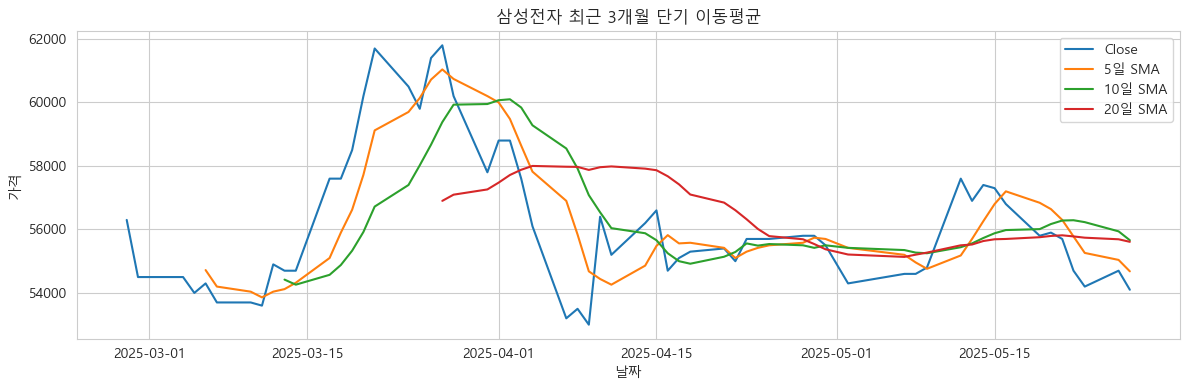

In [104]:
# --------------------------------
# 최근 3개월 단기 SMA
# Close
# Close 5일 SMA
# Close 10일 SMA
# Close 20일 SMA
# --------------------------------
df_3m = df_005930[df_005930.index >= df_005930.index.max() - pd.DateOffset(months=3)].copy()
df_3m['SMA_5'] = df_3m['Close'].rolling(window=5).mean()
df_3m['SMA_10'] = df_3m['Close'].rolling(window=10).mean()
df_3m['SMA_20'] = df_3m['Close'].rolling(window=20).mean()

plt.figure(figsize=(12, 4))
plt.plot(df_3m['Close'], label='Close')
plt.plot(df_3m['SMA_5'], label='5일 SMA')
plt.plot(df_3m['SMA_10'], label='10일 SMA')
plt.plot(df_3m['SMA_20'], label='20일 SMA')
plt.title('삼성전자 최근 3개월 단기 이동평균')
plt.xlabel('날짜')
plt.ylabel('가격')
plt.legend()
plt.tight_layout()
plt.show()

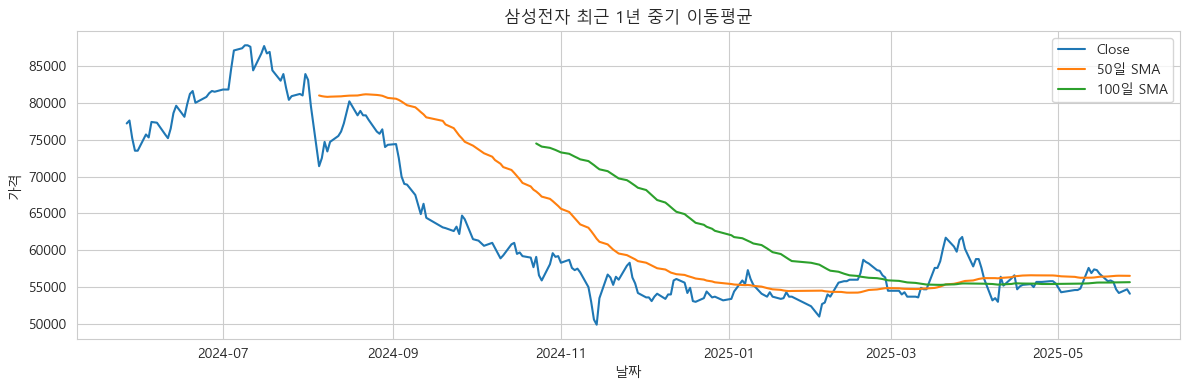

In [105]:
# --------------------------------
# 최근 1년 중기 SMA
# Close
# Close 50일 SMA
# Close 100일 SMA
# --------------------------------
df_1y = df_005930[df_005930.index >= df_005930.index.max() - pd.DateOffset(years=1)].copy()
df_1y['SMA_50'] = df_1y['Close'].rolling(window=50).mean()
df_1y['SMA_100'] = df_1y['Close'].rolling(window=100).mean()

plt.figure(figsize=(12, 4))
plt.plot(df_1y['Close'], label='Close')
plt.plot(df_1y['SMA_50'], label='50일 SMA')
plt.plot(df_1y['SMA_100'], label='100일 SMA')
plt.title('삼성전자 최근 1년 중기 이동평균')
plt.xlabel('날짜')
plt.ylabel('가격')
plt.legend()
plt.tight_layout()
plt.show()

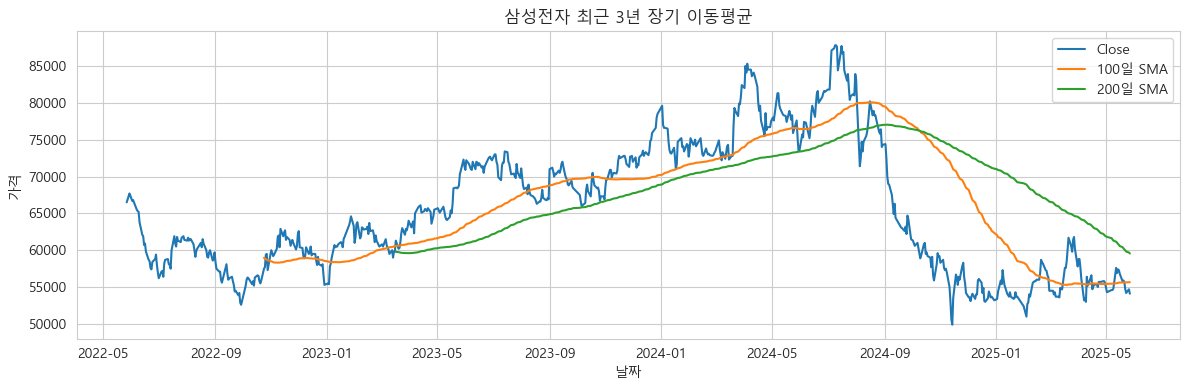

In [106]:
# --------------------------------
# 최근 3년 장기 이동평균
# Close
# Close 100일 이동평균
# Close 200일 이동평균
# --------------------------------
df_3y = df_005930[df_005930.index >= df_005930.index.max() - pd.DateOffset(years=3)].copy()
df_3y['SMA_100'] = df_3y['Close'].rolling(window=100).mean()
df_3y['SMA_200'] = df_3y['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 4))
plt.plot(df_3y['Close'], label='Close')
plt.plot(df_3y['SMA_100'], label='100일 SMA')
plt.plot(df_3y['SMA_200'], label='200일 SMA')
plt.title('삼성전자 최근 3년 장기 이동평균')
plt.xlabel('날짜')
plt.ylabel('가격')
plt.legend()
plt.tight_layout()
plt.show()

### EMA
`컬럼.ewm(span=기간, adjust=False).mean()`

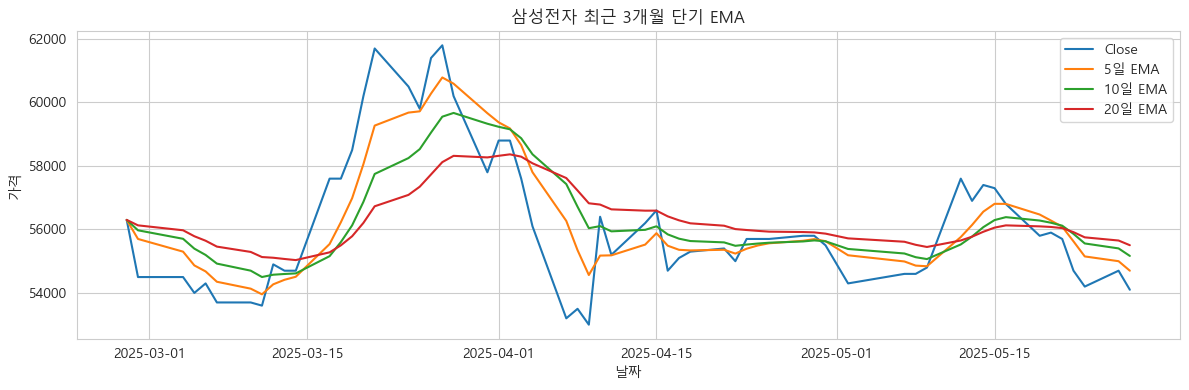

In [107]:
# --------------------------------
# 최근 3개월 단기 EMA
# Close
# Close 5일 EMA
# Close 10일 EMA
# Close 20일 EMA
# --------------------------------
df_3m_ema = df_005930[df_005930.index >= df_005930.index.max() - pd.DateOffset(months=3)].copy()
df_3m_ema['EMA_5'] = df_3m_ema['Close'].ewm(span=5, adjust=False).mean()
df_3m_ema['EMA_10'] = df_3m_ema['Close'].ewm(span=10, adjust=False).mean()
df_3m_ema['EMA_20'] = df_3m_ema['Close'].ewm(span=20, adjust=False).mean()

plt.figure(figsize=(12, 4))
plt.plot(df_3m_ema['Close'], label='Close')
plt.plot(df_3m_ema['EMA_5'], label='5일 EMA')
plt.plot(df_3m_ema['EMA_10'], label='10일 EMA')
plt.plot(df_3m_ema['EMA_20'], label='20일 EMA')
plt.title('삼성전자 최근 3개월 단기 EMA')
plt.xlabel('날짜')
plt.ylabel('가격')
plt.legend()
plt.tight_layout()
plt.show()

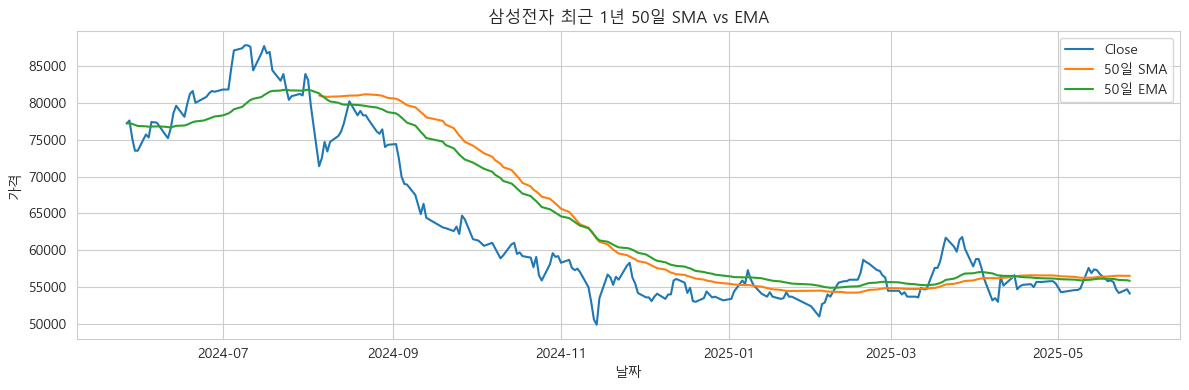

In [108]:
# --------------------------------
# 최근 1년 50일 SMA, EMA
# Close
# Close 50 SMA
# Close 50 EMA
# --------------------------------
df_1y_ema = df_005930[df_005930.index >= df_005930.index.max() - pd.DateOffset(years=1)].copy()
df_1y_ema['SMA_50'] = df_1y_ema['Close'].rolling(window=50).mean()
df_1y_ema['EMA_50'] = df_1y_ema['Close'].ewm(span=50, adjust=False).mean()

plt.figure(figsize=(12, 4))
plt.plot(df_1y_ema['Close'], label='Close')
plt.plot(df_1y_ema['SMA_50'], label='50일 SMA')
plt.plot(df_1y_ema['EMA_50'], label='50일 EMA')
plt.title('삼성전자 최근 1년 50일 SMA vs EMA')
plt.xlabel('날짜')
plt.ylabel('가격')
plt.legend()
plt.tight_layout()
plt.show()

## 누적평균


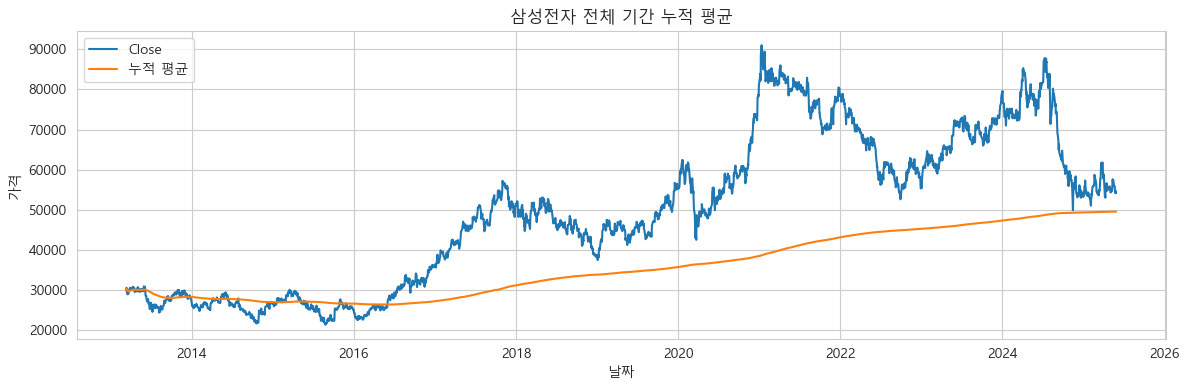

In [109]:
# -------------------
# 전체 기간 누적 평균
# -------------------
df_all_cum = df_005930.copy()
df_all_cum['CumAvg'] = df_all_cum['Close'].expanding().mean()

plt.figure(figsize=(12, 4))
plt.plot(df_all_cum['Close'], label='Close')
plt.plot(df_all_cum['CumAvg'], label='누적 평균')
plt.title('삼성전자 전체 기간 누적 평균')
plt.xlabel('날짜')
plt.ylabel('가격')
plt.legend()
plt.tight_layout()
plt.show()

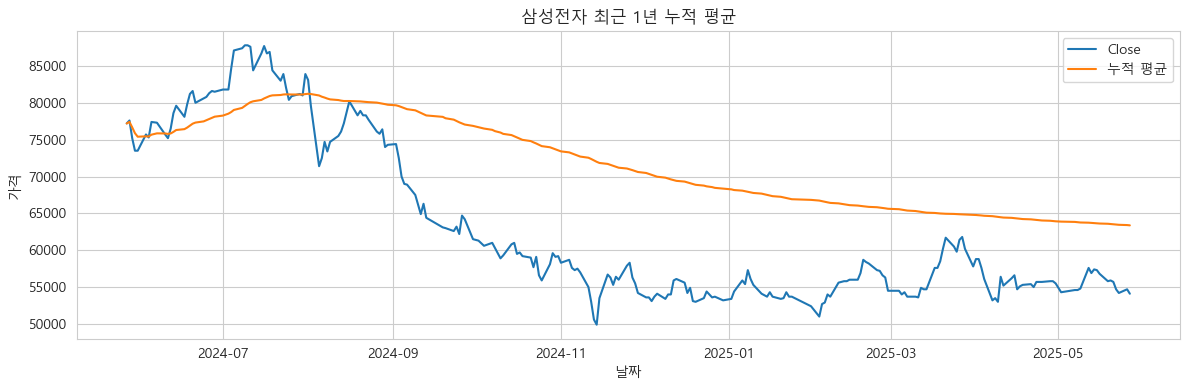

In [110]:
# -------------------
# 최근 1년 누적평균
# -------------------
df_1y_cum = df_005930[df_005930.index >= df_005930.index.max() - pd.DateOffset(years=1)].copy()
df_1y_cum['CumAvg'] = df_1y_cum['Close'].expanding().mean()

plt.figure(figsize=(12, 4))
plt.plot(df_1y_cum['Close'], label='Close')
plt.plot(df_1y_cum['CumAvg'], label='누적 평균')
plt.title('삼성전자 최근 1년 누적 평균')
plt.xlabel('날짜')
plt.ylabel('가격')
plt.legend()
plt.tight_layout()
plt.show()

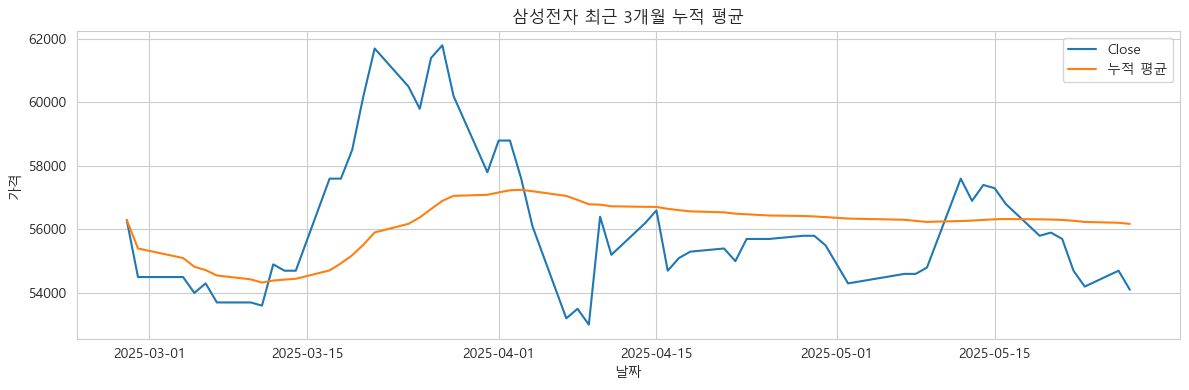

In [111]:
# -------------------
# 최근 3개월 누적평균
# -------------------
df_3m_cum = df_005930[df_005930.index >= df_005930.index.max() - pd.DateOffset(months=3)].copy()
df_3m_cum['CumAvg'] = df_3m_cum['Close'].expanding().mean()

plt.figure(figsize=(12, 4))
plt.plot(df_3m_cum['Close'], label='Close')
plt.plot(df_3m_cum['CumAvg'], label='누적 평균')
plt.title('삼성전자 최근 3개월 누적 평균')
plt.xlabel('날짜')
plt.ylabel('가격')
plt.legend()
plt.tight_layout()
plt.show()

## 볼린저 밴드
* 주식, 외환, 암호화폐 등의 금융시장에서 널리 사용되는 기술적 분석 도구
* 1980년대 초 존 볼린저(John Bollinger)가 개발
* 가격의 변동성을 측정하고 상대적인 고가와 저가 수준을 식별하는 데 도움을 줍니다.
* 볼린저밴드는 세 개의 선으로 구성
    * 중간밴드(Middle Band) : 일반적으로 20일 이동평균선(SMA) 사용
    * 상단밴드(Upper Band) : 중간밴드 + (20일 이동표준편차*2)
    * 하단밴드(Lower Band) : 중간밴드 - (20일 이동표준편차*2)
* 주요 특징과 용도
    * 변동성 측정 : 밴드의 폭이 넓을수록 시장 변동성이 높고, 좁을수록 변동성이 낮다.
    * 과매수/과매도 신호 : 가격이 상단 밴드에 닿으면 과매수(overbought) 상태로, 하단 밴드에 닿으면 과매도(oversold) 상태로 해석할 수 있다.
    * 추세 확인 : 강한 추세에서는 가격이 밴드 방향을 따라 지속적으로 움직인다.
    * 반전 신호 : 가격이 밴드를 벗어났다가 다시 안으로 들어오는 것은 잠재적인 반전 신호가 될 수 있다.
    

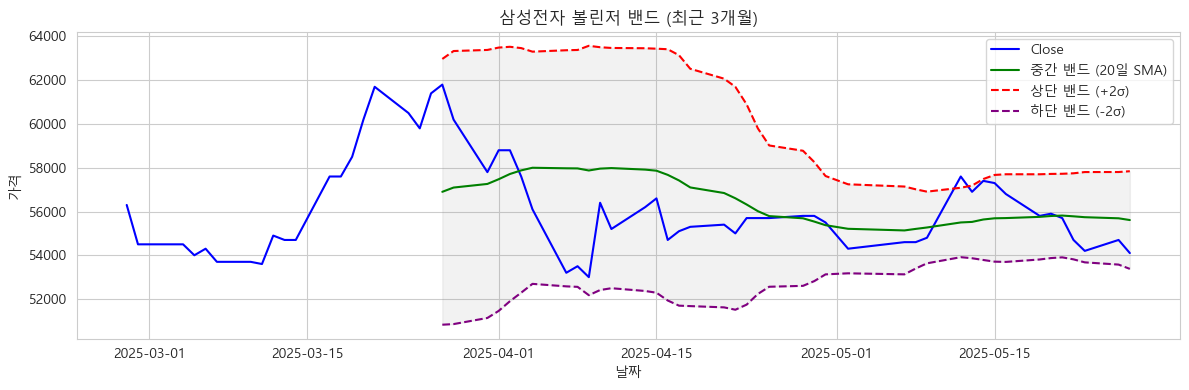

In [112]:
# --------------------------------
# 볼린저 밴드 (최근 3개월)
# --------------------------------
df_boll = df_005930[df_005930.index >= df_005930.index.max() - pd.DateOffset(months=3)].copy()

# 중간밴드(MB): 20일 단순 이동 평균
df_boll['MB'] = df_boll['Close'].rolling(window=20).mean()

# 상단밴드(UB) = MB + 2 * std
df_boll['UB'] = df_boll['MB'] + 2 * df_boll['Close'].rolling(window=20).std()

# 하단밴드(LB) = MB - 2 * std
df_boll['LB'] = df_boll['MB'] - 2 * df_boll['Close'].rolling(window=20).std()

# 시각화
plt.figure(figsize=(12, 4))
plt.plot(df_boll['Close'], label='Close', color='blue')
plt.plot(df_boll['MB'], label='중간 밴드 (20일 SMA)', color='green')
plt.plot(df_boll['UB'], label='상단 밴드 (+2σ)', color='red', linestyle='--')
plt.plot(df_boll['LB'], label='하단 밴드 (-2σ)', color='purple', linestyle='--')
plt.fill_between(df_boll.index, df_boll['UB'], df_boll['LB'], color='gray', alpha=0.1)
plt.title('삼성전자 볼린저 밴드 (최근 3개월)')
plt.xlabel('날짜')
plt.ylabel('가격')
plt.legend()
plt.tight_layout()
plt.show()
